<a href="https://colab.research.google.com/github/jhonatanparada499/supervised-learning-notes/blob/main/recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Kaggle Dataset

In [2]:
# source: https://www.kaggle.com/discussions/general/74235
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

!kaggle datasets download -d sankalpsrivastava26/capital-alphabets-28x28

! unzip "capital-alphabets-28x28.zip"

Streaming output truncated to the last 5000 lines.
  inflating: datasetSmall/validation/t/002691.png  
  inflating: datasetSmall/validation/t/002692.png  
  inflating: datasetSmall/validation/t/002693.png  
  inflating: datasetSmall/validation/t/002694.png  
  inflating: datasetSmall/validation/t/002695.png  
  inflating: datasetSmall/validation/t/002696.png  
  inflating: datasetSmall/validation/t/002697.png  
  inflating: datasetSmall/validation/t/002698.png  
  inflating: datasetSmall/validation/t/002699.png  
  inflating: datasetSmall/validation/t/002700.png  
  inflating: datasetSmall/validation/t/002701.png  
  inflating: datasetSmall/validation/t/002702.png  
  inflating: datasetSmall/validation/t/002703.png  
  inflating: datasetSmall/validation/t/002704.png  
  inflating: datasetSmall/validation/t/002705.png  
  inflating: datasetSmall/validation/t/002706.png  
  inflating: datasetSmall/validation/t/002707.png  
  inflating: datasetSmall/validation/t/002708.png  
  inflating: 

##Import Libraries

In [59]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import metrics, svm, datasets
from sklearn.model_selection import train_test_split
# To encode non-numerical labels
from sklearn.preprocessing import LabelEncoder

# Import image processing library 2026-02-10
import skimage as ski
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import numpy as np

# Import os to handle local files
import os

## Data Transformation Example

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4.  4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4. 12. 16. 17.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  4. 12.  8.  7. 17.  4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  8. 15. 10.  1.  9. 14.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  6. 18. 13.  2.  3. 15.  8.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  2. 15. 20. 12.  9. 12. 15.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. 10. 19. 14. 13. 16. 19.  8.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  6. 16. 11.  2.  4. 14. 12.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  6. 16. 11.  2.  1. 12. 15.  4.  0.  0.  0.  0.  0.]
 [ 0.  0.  2. 14. 11.  2.  1. 10. 17.  6.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  4.  1.  0.  4. 16. 10.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  4.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

Text(0.5, 1.0, 'Resized')

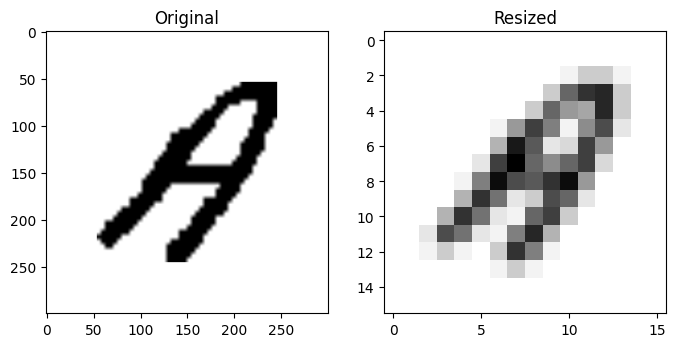

In [70]:
IMG_PATH = "dataset/train/A/000000.png"
img = imread(IMG_PATH) # converts img into numerical data
inverted_img = ski.util.invert(img)
resized_img = resize(inverted_img, (16, 16), anti_aliasing=True) # makes img be 8x8 pixels

# Data Transformation
resized_img = 1.0 - resized_img

if resized_img.max() > 0:
    final_img = (resized_img / resized_img.max()) * 20
else:
    final_img = resized_img

final_img = np.round(final_img, 0) # 0 means the number of decimals
print(final_img)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(inverted_img, cmap=plt.cm.gray)
ax[0].set_title("Original")
# ax[1].imshow(resized_img, cmap=plt.cm.gray) # gray_r means inverted gray
ax[1].imshow(final_img, cmap=plt.cm.gray_r) # gray_r means inverted gray
ax[1].set_title("Resized")

## Defining function to process and save images

In [98]:
# The order of the elements in "the_categories" must be the same as the order of
# the directory categories in "THE_PATH"
def data_preparation(the_categories, THE_PATH, THE_SAMPLE_LIMIT, the_img_size):
  for index, category in enumerate(the_categories):
      img_index = 0
      for file in os.listdir(os.path.join(THE_PATH, category)):

          # Processes n number of samples
          if (img_index >= THE_SAMPLE_LIMIT):
              break

          img_path = os.path.join(THE_PATH, category, file)
          img = imread(img_path) # converts img into numerical data
          inverted_img = ski.util.invert(img)
          resized_img = resize(
              # resizes images to the_img_size
              inverted_img, (the_img_size, the_img_size), anti_aliasing=True)

          # Data Transformation
          # Makes dark values closer to 1 and vicebersa
          resized_img = 1.0 - resized_img

          if resized_img.max() > 0:
              # pixel range is 0 - 16
              final_img = (resized_img / resized_img.max()) * 16
          else:
              final_img = resized_img

          # 0 means the number of decimals
          final_img = np.round(final_img, 0)

          # Populate Features Data values
          images.append(final_img)

          # labels output example: ["A", "A", ... "B", "B", ...]
          labels.append(the_categories[index])

          # save img path to display
          img_paths.append(img_path)

          img_index += 1

## Data Preparation for Kaggle Alphabet and Digits

In [112]:
KAGGLE_ALPHABET_PATH = "dataset/train/"
KAGGLE_DIGITS_PATH = "datasetDigit/train/"

# production
ALPHABET_CATEGORIES = [
    "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
    "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

DIGITS_CATEGORIES = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

images = []
labels = []
img_paths = []

SAMPLE_LIMIT = 1000
IMG_SIZE = 16 # ex. 16 x 16 pixels

# Data preparation for alphabet categories
# appends alphabet features and labels
data_preparation(
    ALPHABET_CATEGORIES,
    KAGGLE_ALPHABET_PATH,
    SAMPLE_LIMIT,
    IMG_SIZE
    )

# Data preparation for SCIKIT_DIGITS categories
# appends kaggle SCIKIT_DIGITS features and labels
data_preparation(
    DIGITS_CATEGORIES,
    KAGGLE_DIGITS_PATH,
    SAMPLE_LIMIT,
    IMG_SIZE
)

## Data Preparation for Scikit-Learn Digits

In [113]:
SCIKIT_DIGITS = datasets.load_digits()
SCIKIT_DIGITS_N_SAMPLES = len(SCIKIT_DIGITS.images)

X = SCIKIT_DIGITS.images
y = SCIKIT_DIGITS.target

for i in range(10):
  target_digit = i
  mask = (y == target_digit)
  X_filtered = X[mask]
  y_filtered = y[mask]
  if len(X_filtered) >= SAMPLE_LIMIT:

      y_samples = y_filtered[:SAMPLE_LIMIT]
      labels.extend(list(map(str, y_samples)))

      X_samples = X_filtered[:SAMPLE_LIMIT]
      for img in X_samples:
        # Resize X_samples to IMG_SIZE X IMG_SIZE
        resized_img = resize(img, (IMG_SIZE, IMG_SIZE), anti_aliasing=True)
        images.append(resized_img)
        img_paths.append(img)

In [114]:
# assigns unique integers to all labels
# print(labels)

le = LabelEncoder()
labels = le.fit_transform(labels)

# print(labels)

Text(0.5, 1.0, 'Resized')

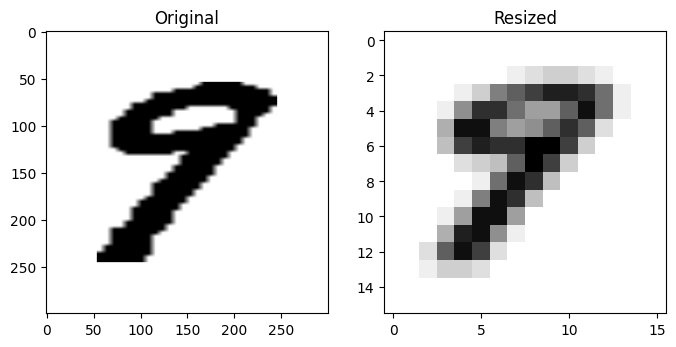

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

# condition to process either paths or 2d-arrays
# img_paths = ["/path/to/file", [[0,0,1,0]], ...]

img_path = img_paths[-1]

if isinstance(img_path, str):
  ax[0].imshow(imread(img_path), cmap=plt.cm.gray_r)
else:
  ax[0].imshow(img_path, cmap=plt.cm.gray_r)

ax[0].set_title("Original")
# ax[1].imshow(resized_img, cmap=plt.cm.gray) # gray_r means inverted gray
ax[1].imshow(images[-1], cmap=plt.cm.gray_r) # gray_r means inverted gray
ax[1].set_title("Resized")

## Classification & Training Data After Shuffle

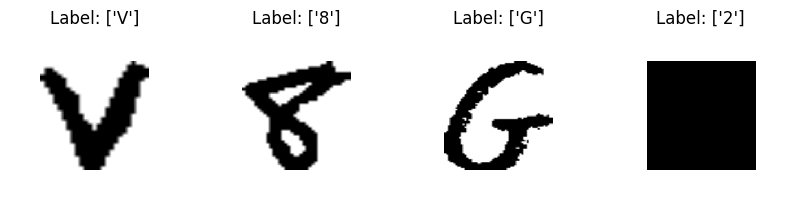

In [116]:
# flatten the images
n_samples = len(images)
# data = images.reshape((n_samples, -1)) # returns error bc reshape is not a memeber of built-in list
data = np.array([img.ravel() for img in images])

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(
    data, labels, img_paths, test_size=.5, shuffle=True # Originally was False
)

# Training images with labels
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label, img_path in zip(axes, X_train, y_train, paths_train):
    ax.set_axis_off()
    # image = image.reshape(8, 8) # returns error bc reshape is not a member of built-in list (only works with scikit-learn dataset)
    #image.shape = (IMG_SIZE, IMG_SIZE)

    if isinstance(img_path, str):
      ax.imshow(imread(img_path), cmap=plt.cm.gray_r, interpolation="nearest")
    else:
      ax.imshow(img_path, cmap=plt.cm.gray_r, interpolation="nearest")

    ax.set_title(f"Label: {le.inverse_transform([label])}")

## Training & Prediction (Kaggle Dataset)

In [117]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

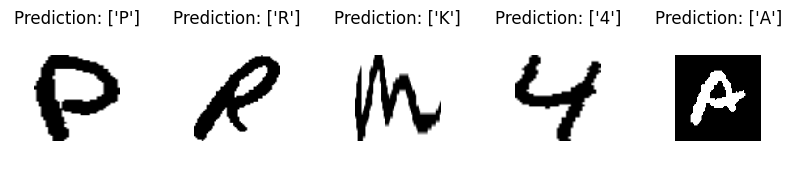

In [118]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction, img_path in zip(axes, X_test, predicted, paths_test):
    ax.set_axis_off()
    #image = image.reshape(8, 8) # returns error in my version
    # image.shape = (8,8)
    if isinstance(img_path, str):
      ax.imshow(imread(img_path), cmap=plt.cm.gray_r, interpolation="nearest")
    else:
      ax.imshow(img_path, cmap=plt.cm.gray_r, interpolation="nearest")

    ax.set_title(f"Prediction: {le.inverse_transform([prediction])}")

## Report

In [119]:
print(
    f"Classification report for Kaggle dataset:\n"
    f"{metrics.classification_report(y_test, predicted, target_names=le.classes_)}\n"
)

Classification report for Kaggle dataset:
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       487
           1       0.35      0.74      0.47       498
           2       0.87      0.79      0.83       528
           3       0.93      0.87      0.90       525
           4       0.91      0.88      0.89       500
           5       0.68      0.73      0.70       502
           6       0.92      0.85      0.88       537
           7       0.90      0.90      0.90       486
           8       0.86      0.86      0.86       480
           9       0.95      0.85      0.90       493
           A       0.89      0.91      0.90       513
           B       0.88      0.84      0.86       511
           C       0.94      0.95      0.94       496
           D       0.89      0.85      0.87       497
           E       0.89      0.80      0.84       535
           F       0.91      0.87      0.89       484
           G       0.85      0.80      

## Confusion Matrix

Confusion matrix:
[[308  18   0 ...   0   0   1]
 [  0 371   0 ...   0   0   1]
 [  0  17 418 ...   0   0  46]
 ...
 [  0  17   2 ... 430   5   3]
 [  0  21   1 ...   2 404   0]
 [  0  16  34 ...   0   1 436]]


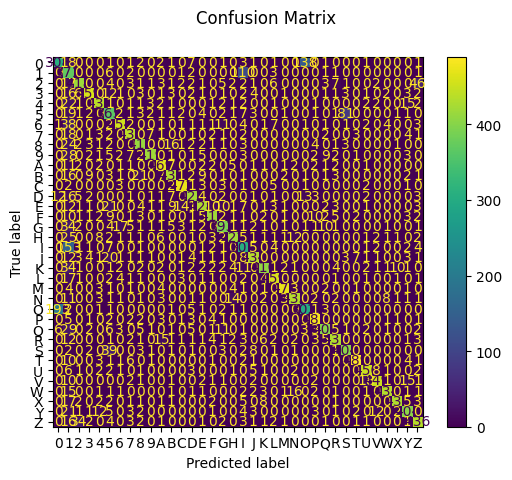

In [120]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, predicted, display_labels=le.classes_)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [121]:
import joblib

filename = 'svm_model.joblib'
joblib.dump(clf, filename)

['svm_model.joblib']